In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import glob, os
import numpy as np
plt.style.use('fivethirtyeight')

api = 'c4ad87b03bec1878bc0be6156d4472b0'
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)
pd.set_option('display.min_rows',20)

In [2]:
quarterly_df = pd.read_csv('master_quarterly_df.csv', low_memory=False)
quarterly_df = quarterly_df.rename(columns={'Unnamed: 0': 'Date'}).drop(['Unnamed: 0.1'],axis=1)
quarterly_df.head()

,Date,Calendar_Year,Quarter,Mkt Cap,Debt to Equity,Debt to Assets,Revenue per Share,NI per Share,outstandingShares,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,Cash,Receivables,Inventory,Cur Assets,Tax Assets,LT Assets,Int Assets,Total Assets,Payables,Deferred Revenue Current,...,Int Coverage,Net Profit Margin,Dividend Yield,Current Ratio,Operating Cycle,Days of AP Outstanding,Cash Conversion Cycle,ROA,ROE,ROCE,PE,PS,PB,Price To FCF,PEG,EPS,Ticker,symbol,name,sector,subSector,headQuarter,dateFirstAdded,cik,founded
0,2022-06-25,"2,022.00",Q3,"203,364.96",0.21,0.56,3.09,0.73,"4,170.00","12,835.00","8,121.00","1,708.00","4,511.00","3,610.00","3,044.00","6,952.00","9,587.00","2,231.00","35,981.00","4,276.00","56,816.00","2,811.00","92,797.00","2,289.00","12,249.00",...,40.11,0.24,0.01,1.49,109.82,43.70,66.12,0.03,0.08,0.05,16.70,15.84,5.03,57.21,5.93,0.73,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26,"2,022.00",Q2,"232,616.63",0.23,0.58,3.04,0.71,"4,205.00","12,720.00","8,049.00","1,670.00","4,559.00","3,487.00","2,973.00","6,731.00","10,000.00","2,059.00","36,799.00","4,269.00","57,463.00","3,079.00","94,262.00","2,101.00","12,268.00",...,39.62,0.23,0.01,1.42,110.43,40.48,69.95,0.03,0.08,0.05,19.56,18.29,5.89,98.94,110.09,0.71,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-25,"2,022.00",Q1,"236,081.46",0.21,0.56,3.06,0.71,"4,243.00","12,900.00","8,053.00","1,714.00","4,610.00","3,438.00","2,980.00","7,619.00","9,376.00","1,832.00","37,588.00","4,198.00","58,393.00","3,350.00","95,981.00","2,261.00","12,017.00",...,38.63,0.23,0.01,1.62,99.43,41.98,57.45,0.03,0.07,0.05,19.81,18.30,5.53,71.43,112.40,0.71,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-25,"2,021.00",Q4,"233,439.92",0.22,0.58,3.11,0.71,"4,238.00","13,126.00","8,344.00","1,713.00","4,761.00","3,575.00","3,009.00","9,175.00","10,146.00","1,559.00","39,112.00","4,360.00","58,385.00","3,619.00","97,497.00","2,362.00","12,148.00",...,36.48,0.23,0.01,1.49,98.91,44.45,54.45,0.03,0.07,0.05,19.40,17.78,5.66,53.76,4.40,0.71,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-06-26,"2,021.00",Q3,"214,789.29",0.24,0.57,3.03,0.68,"4,238.00","12,803.00","8,185.00","1,697.00","4,678.00","3,465.00","2,863.00","7,350.00","9,073.00","1,579.00","37,060.00","4,070.00","56,836.00","3,716.00","93,896.00","2,440.00","11,492.00",...,31.22,0.22,0.01,1.53,94.55,47.55,47.00,0.03,0.07,0.05,18.76,16.78,5.34,57.93,1.41,0.68,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def df_sector():
    df = pd.read_csv('/Users/brendan/Desktop/Python/BoostedAI/master_df.csv')
    df = df[['Ticker','mktCap', 'price','companyName','exchangeShortName','sector','industry']]
    return df

In [4]:
df_sector = df_sector()
df_sector.head()

,Ticker,mktCap,price,companyName,exchangeShortName,sector,industry
0,MOS,"19,062,550,528.00",52.66,The Mosaic Company,NYSE,Basic Materials,Agricultural Inputs
1,GRMN,"19,728,025,600.00",97.62,Garmin Ltd.,NYSE,Technology,Scientific & Technical Instruments
2,DGX,"16,029,221,888.00",136.57,Quest Diagnostics Incorporated,NYSE,Healthcare,Diagnostics & Research
3,ATO,"16,875,031,552.00",121.39,Atmos Energy Corporation,NYSE,Utilities,Utilities—Regulated Gas
4,IQV,"44,812,279,808.00",240.27,IQVIA Holdings Inc.,NYSE,Healthcare,Diagnostics & Research


In [5]:
merged_df = quarterly_df.merge(df_sector, how='inner',on=['Ticker'])
merged_df.columns

Index(['Date', 'Calendar_Year', 'Quarter', 'Mkt Cap', 'Debt to Equity',
       'Debt to Assets', 'Revenue per Share', 'NI per Share',
       'outstandingShares', 'Revenue', 'Gross Profit', 'R&D Expenses',
       'Op Expenses', 'Op Income', 'Net Income', 'Cash', 'Receivables',
       'Inventory', 'Cur Assets', 'Tax Assets', 'LT Assets', 'Int Assets',
       'Total Assets', 'Payables', 'Deferred Revenue Current',
       'Deferred Revenue LongTerm', 'Cur Liab', 'LT Debt', 'LT Liab',
       'Total Liab', 'SH Equity', 'cash_flow Operations',
       'cash_flow Investing', 'cash_flow Financing', 'CAPEX', 'Fcash_flow',
       'Dividends Paid', 'Gross Profit Margin', 'Op Margin', 'Int Coverage',
       'Net Profit Margin', 'Dividend Yield', 'Current Ratio',
       'Operating Cycle', 'Days of AP Outstanding', 'Cash Conversion Cycle',
       'ROA', 'ROE', 'ROCE', 'PE', 'PS', 'PB', 'Price To FCF', 'PEG', 'EPS',
       'Ticker', 'symbol', 'name', 'sector_x', 'subSector', 'headQuarter',
       'date

In [6]:
merged_df = merged_df[['Date', 'Calendar_Year', 'Quarter', 'Ticker','Mkt Cap', 'sector_y','industry','Revenue', 'Gross Profit', 'R&D Expenses',
       'Op Expenses', 'Op Income', 'Net Income']]

In [7]:
merged_df.tail()

,Date,Calendar_Year,Quarter,Ticker,Mkt Cap,sector_y,industry,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income
47449,1996-12-27,"1,996.00",Q3,PPL,"3,284.85",Utilities,Utilities—Regulated Electric,715.00,507.00,0.00,319.00,188.00,86.00
47450,1996-09-27,"1,996.00",Q2,PPL,"3,550.96",Utilities,Utilities—Regulated Electric,669.00,494.00,0.00,321.00,173.00,68.00
47451,1996-06-28,"1,996.00",Q1,PPL,"3,607.58",Utilities,Utilities—Regulated Electric,789.00,574.00,0.00,309.00,265.00,123.00
47452,1996-03-29,"1,995.00",Q4,PPL,"3,700.08",Utilities,Utilities—Regulated Electric,732.90,544.30,0.00,364.00,180.30,96.50
47453,1995-12-29,"1,995.00",Q3,PPL,"3,451.77",Utilities,Utilities—Regulated Electric,682.20,490.10,0.00,218.80,271.30,94.10


In [8]:
tech = merged_df[merged_df['sector_y']=='Technology']
tech['industry'].value_counts()

Semiconductors                         1275
Information Technology Services         976
Software—Infrastructure                 970
Software—Application                    966
Semiconductor Equipment & Materials     467
Communication Equipment                 462
Computer Hardware                       436
Scientific & Technical Instruments      335
Electronic Components                   297
Consumer Electronics                    131
Solar                                    70
Name: industry, dtype: int64

In [9]:
semis = merged_df[merged_df['industry']=='Semiconductors']

In [10]:
semis.head()

,Date,Calendar_Year,Quarter,Ticker,Mkt Cap,sector_y,industry,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income
1559,2022-06-25,"2,022.00",Q4,QRVO,"13,175.53",Technology,Semiconductors,"1,166.16",570.34,158.75,299.74,270.60,212.28
1560,2022-03-26,"2,022.00",Q3,QRVO,"16,994.59",Technology,Semiconductors,"1,113.96",548.09,154.44,252.08,296.01,216.26
1561,2021-12-25,"2,022.00",Q2,QRVO,"18,696.63",Technology,Semiconductors,"1,255.25",621.55,158.38,259.19,362.36,319.19
1562,2021-09-25,"2,022.00",Q1,QRVO,"21,758.24",Technology,Semiconductors,"1,110.35",546.18,152.08,249.08,297.10,285.63
1563,2021-06-26,"2,021.00",Q4,QRVO,"22,322.31",Technology,Semiconductors,"1,072.73",528.48,147.28,235.41,293.07,298.74


In [11]:
#semis.set_index('Date', inplace=True)
semis.groupby('Ticker')['Revenue'].plot.area(legend=True)
#plt.show()

Ticker
ADI     AxesSubplot(0.08,0.07;0.87x0.81)
AMD     AxesSubplot(0.08,0.07;0.87x0.81)
AVGO    AxesSubplot(0.08,0.07;0.87x0.81)
INTC    AxesSubplot(0.08,0.07;0.87x0.81)
MCHP    AxesSubplot(0.08,0.07;0.87x0.81)
MPWR    AxesSubplot(0.08,0.07;0.87x0.81)
MU      AxesSubplot(0.08,0.07;0.87x0.81)
NVDA    AxesSubplot(0.08,0.07;0.87x0.81)
NXPI    AxesSubplot(0.08,0.07;0.87x0.81)
ON      AxesSubplot(0.08,0.07;0.87x0.81)
QCOM    AxesSubplot(0.08,0.07;0.87x0.81)
QRVO    AxesSubplot(0.08,0.07;0.87x0.81)
SWKS    AxesSubplot(0.08,0.07;0.87x0.81)
TXN     AxesSubplot(0.08,0.07;0.87x0.81)
Name: Revenue, dtype: object

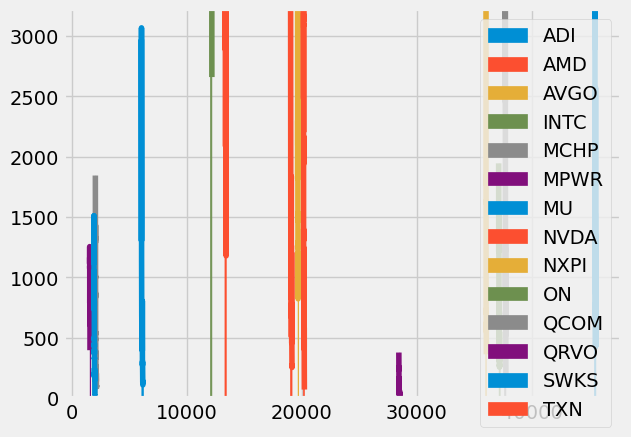

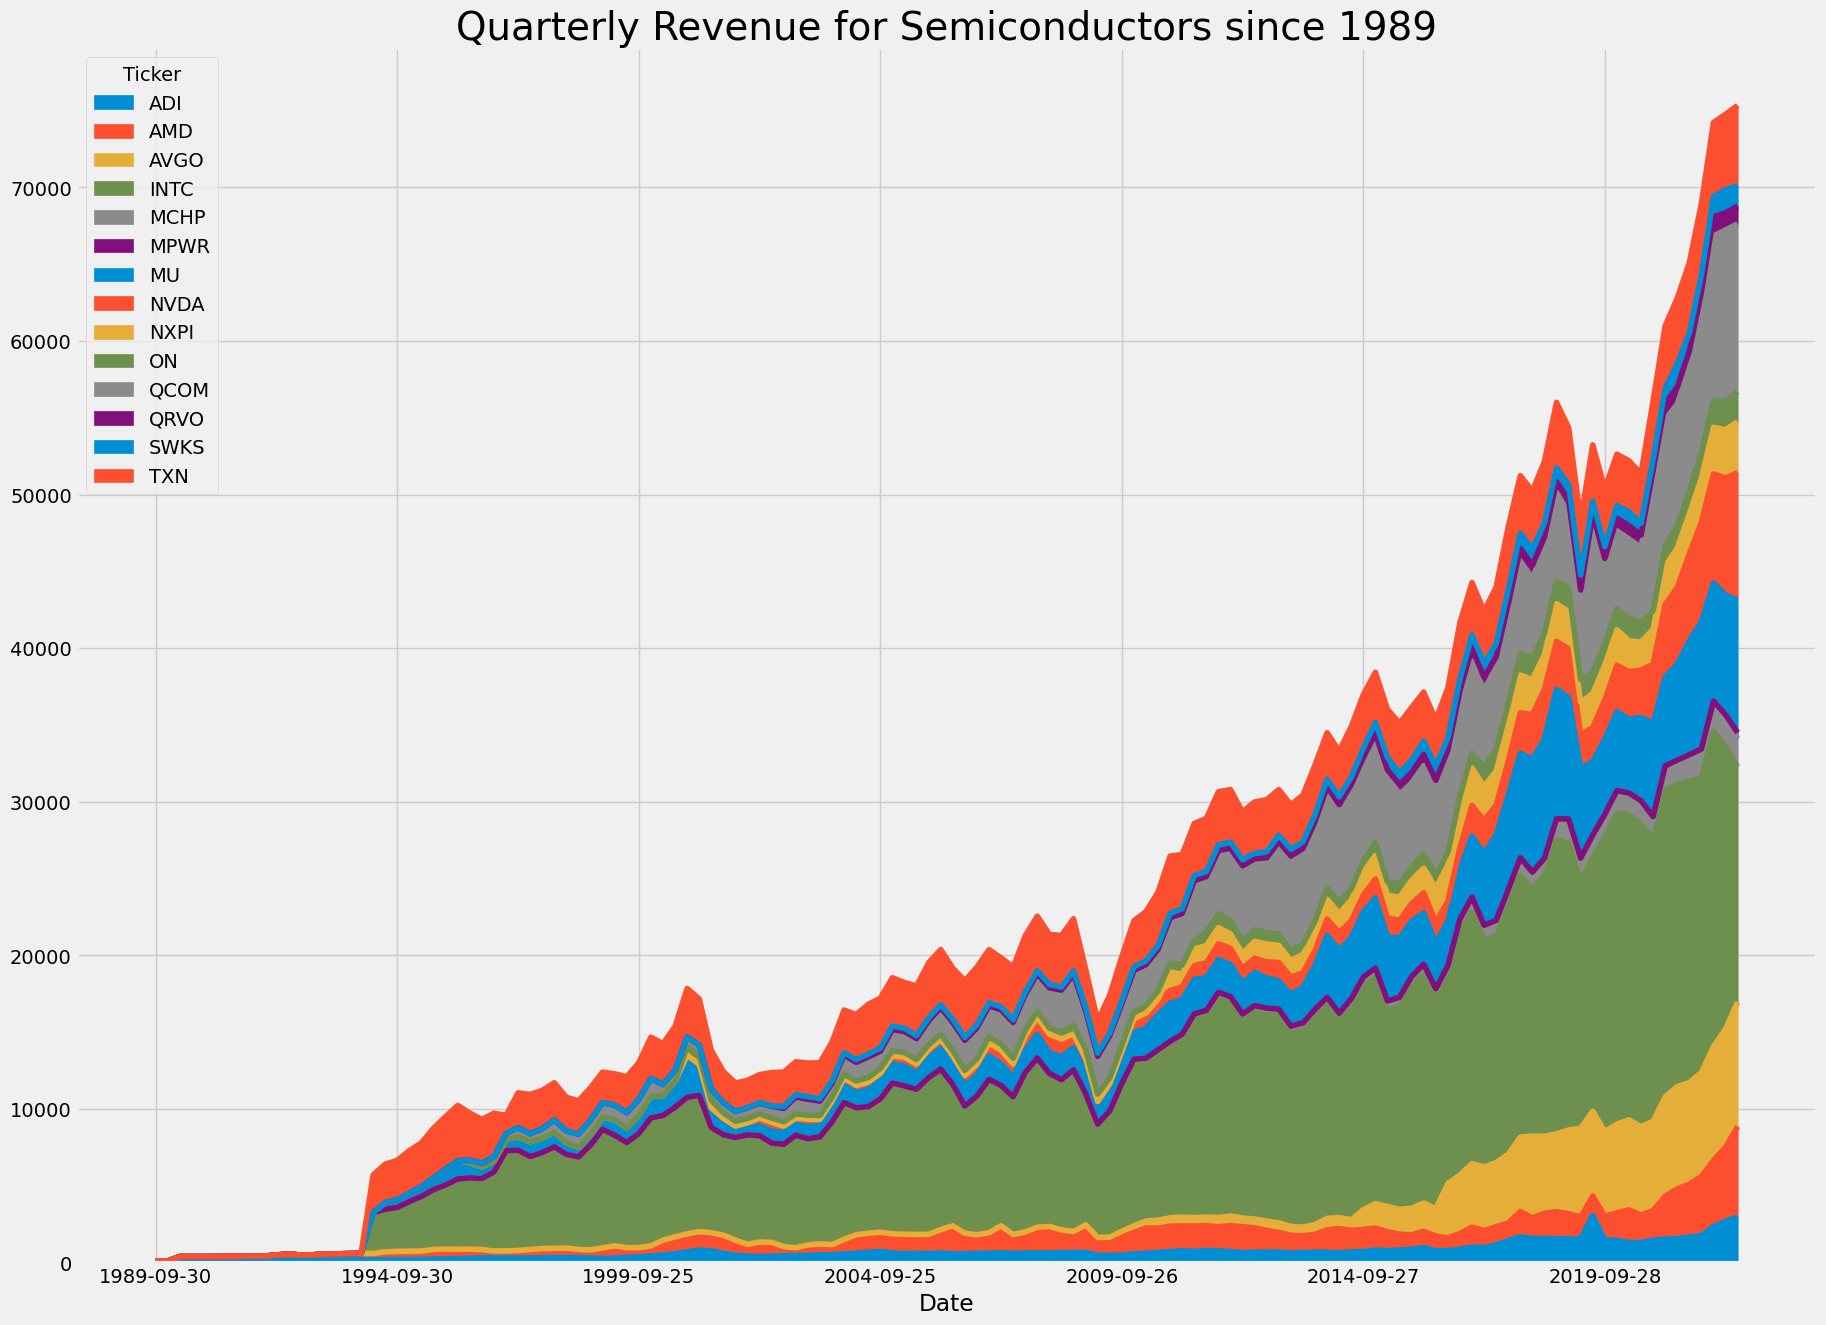

In [12]:
#plt.figure(figsize=(20,10))
semis.groupby(['Date', 'Ticker'])['Revenue'].sum().unstack().plot(figsize=(20,15),kind='area', stacked=True)
plt.title('Quarterly Revenue for Semiconductors since 1989', size=28)
plt.show()

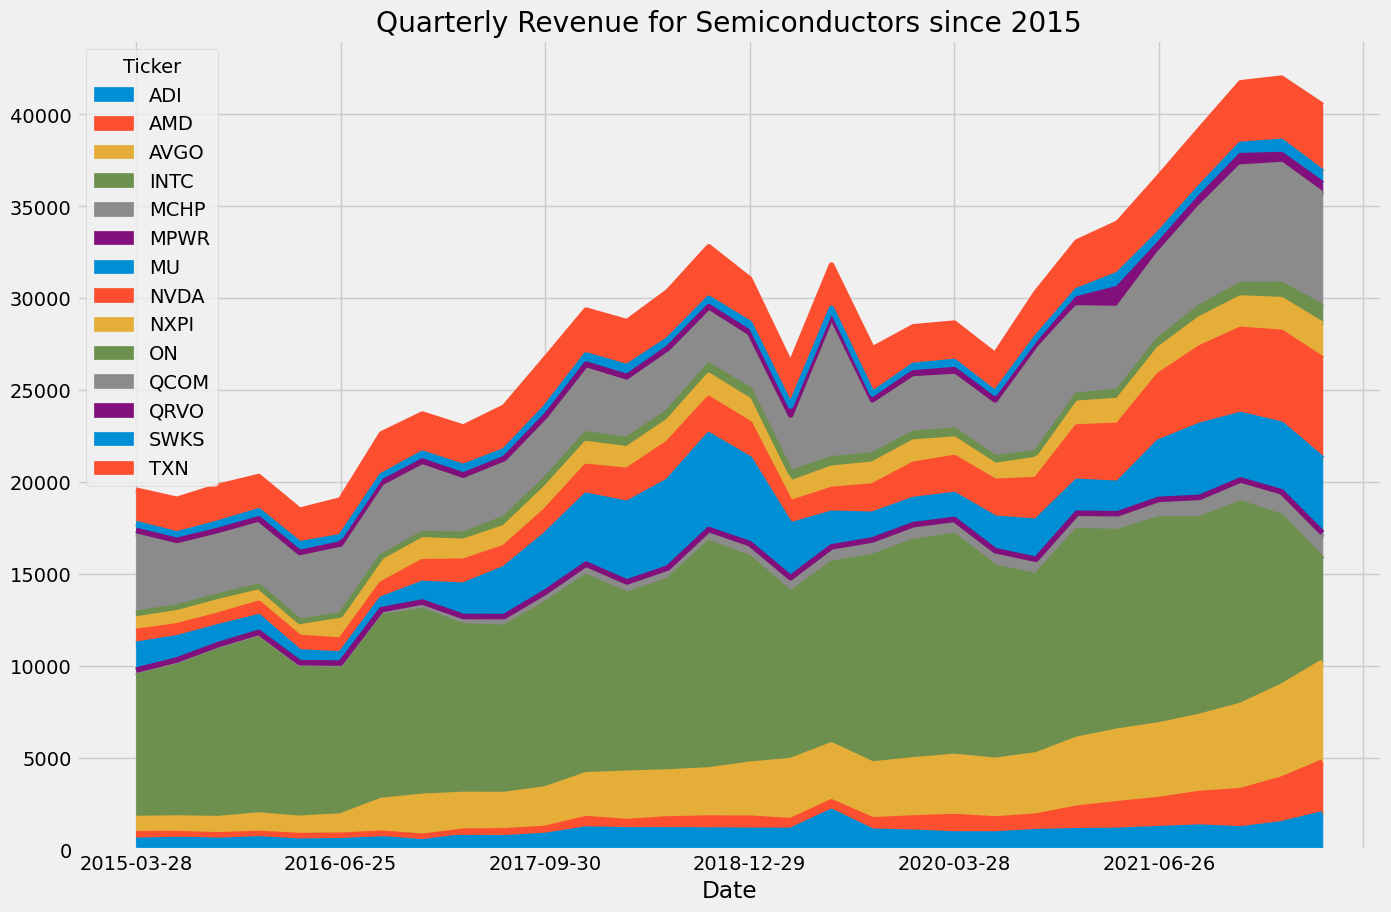

In [13]:
# gross profit
semis[semis['Gross Profit']<0]
#semis[semis['Op Income']<0]
semis_2015 = semis[semis['Date']>'2015-01-01']
semis_2015.groupby(['Date', 'Ticker'])['Gross Profit'].sum().unstack().plot(figsize=(15,10),kind='area', stacked=True)
plt.title('Quarterly Revenue for Semiconductors since 2015')
plt.show()